In [2]:
import pandas as pd
import chardet

In [3]:
# Detectar la codificación del archivo
with open('telefonos.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f'Codificación detectada: {encoding}')

# Leer el archivo CSV con la codificación detectada
df = pd.read_csv('telefonos.csv', encoding=encoding, delimiter=';')


Codificación detectada: ISO-8859-1


In [4]:
# Mostrar las primeras filas del DataFrame
df.head(20)

,Fecha,Representante,CódigoProducto,Unidades
0,1/1/2014,Valentina Tapia Castro,B00F3J4B5S,4.0
1,2/1/2014,Gabriela Rojas Huerta,B018IZ0SWI,2.0
2,2/1/2014,Carla Fernández Mendoza,B01DZJFWNC,1.0
3,2/1/2014,Luisa García López,B01DZJFWNC,2.0
4,2/1/2014,Juan Carlos Rodríguez Huamán,B016381QZA,4.0
5,3/1/2014,Ricardo Gómez Vargas,B00J0O5J4Y,2.0
6,3/1/2014,Diego Morales Castro,B01KBH547A,3.0
7,4/1/2014,Silvia Ramírez Rivera,B00K15Q2B0,15.0
8,4/1/2014,Laura Flores Guzmán,B00NQGP42Y,2.0
9,4/1/2014,Eduardo Cáceres Salazar,B00NQGP42Y,2.0


In [5]:
df = df.rename(columns={
    'CódigoProducto': 'Id Producto',
    'Unidades': 'Unidades Vendidas'
})

In [6]:
isna = df[df['Unidades Vendidas'].isna()]
cellphones = df[df['Unidades Vendidas'].notna()]

In [7]:
cellphones

,Fecha,Representante,Id Producto,Unidades Vendidas
0,1/1/2014,Valentina Tapia Castro,B00F3J4B5S,4.0
1,2/1/2014,Gabriela Rojas Huerta,B018IZ0SWI,2.0
2,2/1/2014,Carla Fernández Mendoza,B01DZJFWNC,1.0
3,2/1/2014,Luisa García López,B01DZJFWNC,2.0
4,2/1/2014,Juan Carlos Rodríguez Huamán,B016381QZA,4.0
...,...,...,...,...
9995,31/12/2015,Luisa Fernández Vargas,B01DZJFWNC,2.0
9996,31/12/2015,José Morales Huamán,B00F3J4B5S,3.0
9997,31/12/2015,Ana Paula Rojas Torres,B00K15Q2B0,1.0
9998,31/12/2015,Miguel Ángel Vega López,B018IZ0SWI,2.0


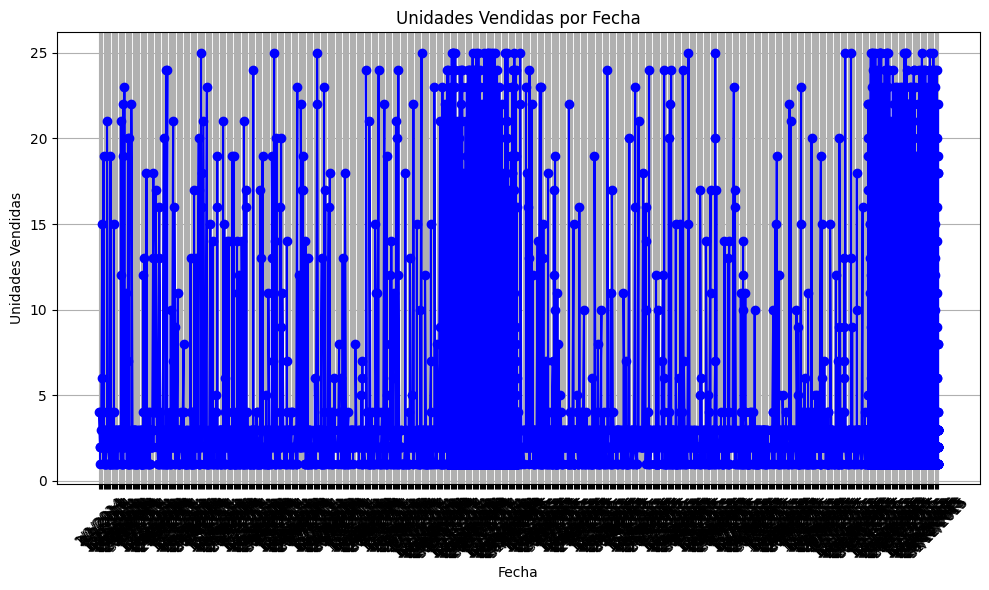

In [8]:
import matplotlib.pyplot as plt

items_sold = cellphones[['Fecha','Unidades Vendidas']]

plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico (opcional)
plt.plot(items_sold['Fecha'], items_sold['Unidades Vendidas'], marker='o', linestyle='-', color='b')  # Crear el gráfico de líneas
plt.title('Unidades Vendidas por Fecha')  # Añadir título al gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Unidades Vendidas')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x (opcional para mejor visualización)
plt.grid(True)  # Mostrar cuadrícula (opcional)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()